In [1]:
#from preamble import *
#%matplotlib inline
#=================================
from IPython.display import set_matplotlib_formats, display
import pandas as pd
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=( cycler('color', mglearn.plot_helpers.cm_cycle.colors) +  cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


/var/folders/l_/499_8k_5387b9tz3wp5g8lg00000gn/T/ipykernel_2693/2603895367.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'png')


> You now possess all the required skills and know the necessary mechanisms to apply machine learning in practice. In the next chapter, we will dive in more detail into one particular type of data that is commonly seen in practice, and that requires some special expertise to handle correctly: text data. <br><br>


## Working with Text Data

- We will need to process the data before we can apply our machine learning algorithms to it. <br><br>
- We have seen two kinds of features that can represent properties of the data: 
  - continuous features that describe a quantity,  
  - categorical features that are items from a fixed list.  <br><br>
- There is a third kind of feature that can be found in many applications,  <br><br>
  - text features e.g email, tweets, etc

> Text data is usually represented as strings, made up of characters. This feature is clearly very different from the numeric features that we’ve discussed so far, and we will need to process the data before we can apply our machine learning algorithms to it


<center>

![](./images/featurersandtarget.png)

<center>

<center>

![Iamge](https://cdn.numerade.com/ask_images/fc5cecce79914177808ec147b0eddb54.jpg)

<center>


<center>

![Iamge](https://onlinelibrary.wiley.com/cms/asset/f0957aa1-a8f4-4372-9b7c-a97185821b1b/cpe4209-fig-0002-m.jpg)

<center>


### Types of data represented as strings

There are four kinds of string data you might see:  <br><br>
- Categorical data <br>
- Free strings that can be semantically mapped to categories   <br>
- Structured string data  <br>
- Text data





### Categorical Data

- Categorical data is data that comes from a fixed list. <br><br>
- Say you collect data via a survey where you ask people their favorite color, with a drop-down menu that allows them to select from “red,” “green,” “blue,” “yellow,” “black,” “white,” “purple,” and “pink.”  <br><br>
- This will result in a dataset with exactly eight different possible values, which clearly encode a categorical variable.  <br><br>


###  Free String

- Imagine instead of providing a drop-down menu, you provide a text field for the users to provide their own favorite colors.  <br><br>
- Many people might respond with a color name like “black” or “blue.” Others might make typographical errors, use different spellings like “gray” and “grey,” or use more evocative and specific names like “midnight blue.” <br><br>
- You will also have some very strange entries. “my dentist’s office orange. <br><br>
- This belong to the second category of strings called free strings that can be semantically mapped to categories. <br><br>
- It will probably be best to encode this data as a categorical variable, where you can select the categories either by using the most common entries, or by defining categories that will capture responses in a way that makes sense for your application. 


### Structured

- Often manually entered values do not correspond to fixed categories, but still have some underlying structure, like addresses, names of places or people, dates, telephone numbers, or other identifiers. <br><br>
- These kinds of strings are often very hard to parse, and their treatment is highly dependent on context and domain. 


## Text Data

- The final category of string data is free form text data that consists of phrases or sentences. <br><br>
-  Examples include tweets, chat logs, and hotel reviews, as well as the collected works of Shakespeare, the content of Wikipedia, or the Project Gutenberg collection of 50,000 ebooks. 
- In NLP, In the context of text analysis, the dataset is often called the corpus, and each data point, represented as a single text, is called a document. 





<center>

![Iamge](https://miro.medium.com/max/1838/1*TDF6jWl2PBdZySfHg_DkeA.png)

<center>





<center>

![Iamge](
https://www.researchgate.net/profile/Hiroki-Ouchi/publication/311669623/figure/fig4/AS:439788613443585@1481865184595/The-flow-of-the-corpus-and-dataset-creation-From-the-original-logs-we-extract-addressee.png)

<center>


#### Example application: Sentiment analysis of movie reviews

In [2]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data

zsh:1: command not found: wget


<center>

![Iamge](https://miro.medium.com/max/886/1*xLoPv538-PCpRGmkIkgPtw.png)

<center>




In [3]:
! tar xzf data/aclImdb_v1.tar.gz -C data

aclImdb/train/unsupBow.feat: truncated gzip input
tar: Error exit delayed from previous errors.


In [4]:
!tree -dL 2 data/aclImdb

zsh:1: command not found: tree


In [5]:
!rm -r data/aclImdb/train/unsup

In [6]:
!tree -dL 2 data/aclImdb

zsh:1: command not found: tree


There is a helper function in scikit-learn to load files stored in such a folder structure, where each subfolder corresponds to a label, called load_files. We apply the load_files function first to the training data


What is helper function?

In [7]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))

type of text_train: <class 'list'>
length of text_train: 25000


In [8]:
print("text_train[6]:\n{}".format(text_train[6]))

text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


- You can see that text_train is a list of length 25,000, where each entry is a string containing a review. We printed the review with index 1. You can also see that the review contains some HTML line breaks `(<br />)`.<br><br> 

- While these are unlikely to have a large impact on our machine learning models, it is better to clean the data and remove this formatting before we proceed



In [9]:
txt = "I like bananas"

x = txt.replace("bananas", "apples")

x

'I like apples'

In [10]:
fruits = ["Apple", "Banana", "Cherry", "Kiwi", "Mango"]

newlist = [x.lower() for x in fruits]

print(newlist)

['apple', 'banana', 'cherry', 'kiwi', 'mango']


In [11]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [12]:
print("text_train[6]:\n{}".format(text_train[6]))

text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


What do we want predict?  

In [13]:
target = pd.DataFrame(y_train) # 0 = negative, 1 = positive
target

,0
0,1
1,0
2,1
3,0
4,0
...,...
24995,1
24996,1
24997,0
24998,0


In [14]:
np.unique(y_train)

array([0, 1])

The dataset was collected such that the positive class and the negative class balanced, so that there are as many positive as negative strings:


In [15]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


Lets observe test set data

In [16]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


### Representing text data as Bag of Words

> One of the most simple but effective and commonly used ways to represent text for machine learning is using the bag-of-words representation. When using this representation, we discard most of the structure of the input text, like chapters, paragraphs, sentences, and formatting, and only count how much each word appears in each text in the corpus




<center>

![Iamge](https://dataaspirant.com/wp-content/uploads/2021/01/1-Bag-of-words.png)

<center>




<center>

![Iamge](https://miro.medium.com/max/1400/0*ahNY0R4Lm5oqr5yy.png)

<center>



















Computing the bag-of-words representation for a corpus of documents consists of the following three steps


 1. Tokenization. Split each document into the words that appear in it (called tokens), for example by splitting them on whitespace and punctuation. <br><br>
 2. Vocabulary building. Collect a vocabulary of all words that appear in any of the documents, and number them (say, in alphabetical order). <br><br>
 3. Encoding. For each document, count how often each of the words in the vocabulary appear in this document.


![bag_of_words](images/bag_of_words.png)

#### Applying bag-of-words to a toy dataset

In [17]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

The bag-of-words representation is implemented in CountVectorizer, which is a transformer


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

Fitting the CountVectorizer consists of the tokenization of the training data and building of the vocabulary, which we can access as the vocabulary_ attribute:


In [19]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


To create the bag-of-words representation for the training data, we call the transform method:


In [20]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


The bag-of-words representation is stored in a SciPy sparse matrix that only stores the entries that are nonzero. The matrix is of shape 2×13, with one row for each of the two data points and one feature for each of the words in the vocabulary. A sparse matrix is used as most documents only contain a small subset of the words in the vocabulary, meaning most entries in the feature array are 0


Storing all those zeros would be prohibitive, and a waste of memory. To look at the actual content of the sparse matrix, we can convert it to a “dense” NumPy array (that also stores all the 0 entries) using the toarray method


In [21]:
print("Dense representation of bag_of_words:\n{}".format(
    bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


bards_words =["The fool doth think he is wise,", \
"but the wise man knows himself to be a fool"]


Let’s take a look at how to read these feature vectors. The first string ("The fool doth think he is wise,") is represented as the first row in, and it contains the first word in the vocabulary, "be", zero times. It also contains the second word in the vocabulary, "but", zero times. It contains the third word, "doth", once, and so on. Looking at both rows, we can see that the fourth word, "fool", the tenth word, "the", and the thirteenth word, "wise", appear in both strings


### Bag-of-word for movie reviews

Now that we’ve gone through the bag-of-words process in detail, let’s apply it to our task of sentiment analysis for movie reviews.

In [22]:
text_train[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.  It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see.   Flawed but honest with a terrible honesty."

In [23]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


The shape of X_train, the bag-of-words representation of the training data, is 25,000×74,849, indicating that the vocabulary contains 74,849 entries. Again, the data is stored as a SciPy sparse matrix. 


Let’s look at the vocabulary in a bit more detail. Another way to access the vocabulary is using the get_feature_name method of the vectorizer, which returns a convenient list where each entry corresponds to one feature:

In [24]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


As you can see, possibly a bit surprisingly, the first 10 entries in the vocabulary are all numbers. All these numbers appear somewhere in the reviews, and are therefore extracted as words. Most of these numbers don’t have any immediate semantic meaning—apart from "007", which in the particular context of movies is likely to refer to the James Bond character


> Before we try to improve our feature extraction, let’s obtain a quantitative measure of performance by actually building a classifier. We have the training labels stored in y_train and the bag-of-words representation of the training data in X_train, so we can train a classifier on this data. For high-dimensional, sparse data like this, linear models like LogisticRegression often work best


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter = 1000), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


We obtain a mean cross-validation score of 88%, which indicates reasonable performance for a balanced binary classification task. We know that LogisticRegression has a regularization parameter, C, which we can tune via cross-validation:


In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We obtain a cross-validation score of 89% using C=0.1. We can now assess the generalization performance of this parameter setting on the test set:


In [27]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.88


You may notice that we violate our lesson from Chapter 6 on cross-validation with preprocessing here. Using the default settings of CountVectorizer, it actually does not collect any statistics, so our results are valid. Using Pipeline from the start would be a better choice for applications, but we defer it for ease of exposure.

### How can we improve performance?

- One way to select important feautures is to select only use tokens that appear in at least two documents (or at least five documents, and so on). <br><br>

- A token that appears only in a single document is unlikely to appear in the test set and is therefore not helpful. We can set the minimum number of documents a token needs to appear in with the min_df parameter


In [28]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


By requiring at least five appearances of each token, we can bring down the number of features to 27,271, as seen in the preceding output—only about a third of the original features. Let’s look at some tokens again


In [29]:
feature_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciati

/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


There are clearly many fewer numbers, and some of the more obscure words or misspellings seem to have vanished.

>  Let’s see how well our model performs by doing a grid search again:


In [29]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Best cross-validation score: 0.89


/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>The best validation accuracy of the grid search is still 89%, unchanged from before. We didn’t improve our model, but having fewer features to deal with speeds up processing and throwing away useless features might make the model more interpretabl

### Stop-words

- Another way that we can get rid of uninformative words is by discarding words that are too frequent to be informative. <br><br>
- There are two main approaches: using a languagespecific list of stopwords, or discarding words that appear too frequently. 


In [76]:
a = [1,2,4,4,5,6,7,8,9,10]

#a[1:5:2]
#a[:5] # first 5 elements
a[::2] # every other element

[1, 4, 5, 7, 9]

In [30]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10])) # every 10th stopword

Number of stop words: 318
Every 10th stopword:
['are', 'toward', 'about', 'this', 'every', 'became', 'on', 'yet', 'has', 'around', 'somewhere', 'thereupon', 'those', 'anyway', 'me', 'rather', 'if', 'from', 'own', 'forty', 'upon', 'whereafter', 'fill', 'under', 'whoever', 'nothing', 'five', 'whenever', 'into', 'twelve', 'we', 'co']


In [31]:
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[:10]))

Every 10th stopword:
['are', 'fifty', 'two', 'still', 'herself', 'describe', 'four', 'whether', 'therefore', 'together']


>Clearly, removing the stopwords in the list can only decrease the number of features by the length of the list—here, 318—but it might lead to an improvement in performance. Let’s give it a try

In [33]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


> There are now 305 fewer features in the dataset, which means that most, but not all, of the stopwords appeared. Let’s run the grid search again

In [35]:
grid = GridSearchCV(LogisticRegression(max_iter = 1000 ), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


> The grid search performance decreased slightly using the stopwords—not enough to worry about, but given that excluding 305 features out of over 27,000 is unlikely to change performance or interpretability a lot, it doesn’t seem worth using this list”

### Rescaling the Data with tf-idf
> Instead of dropping features that are deemed unimportant, another approach is to rescale features by how informative we expect them to be. One of the most common ways to do this is using the term frequency–inverse document frequency (tf–idf) method

\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \log\big(\frac{N + 1}{N_w + 1}\big) + 1
\end{equation*}

> where N is the number of documents in the training set, N_w is the number of documents in the training set that the word w appears in, and tf (the term frequency) is the number of times that the word w appears in the query document d (the document you want to transform or encode).

Article on [tf-idf](https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3)

> Because tf–idf actually makes use of the statistical *properties* of the training data, we will use a pipeline, as described in Chapter 6, to ensure the *results* of our grid search are valid. This leads to the following code:

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression(max_iter= 1000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


As you can see, there is some improvement when using tf–idf instead of just word counts

> We can also inspect which words tf–idf found most important. First, we extract the TfidfVectorizer from the pipeline:

In [38]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over dataset:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Features with highest tfidf: 
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


/Users/shamsuddeenmuhammad/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


> Features with low tf–idf are those that either are very commonly used across documents or are only used sparingly, and only in very long documents. Interestingly, many of the high-tf–idf features actually identify certain shows or movies. These terms only appear in reviews for this particular show or franchise, but tend to appear very often in these particular reviews. This is very clear, for example, for "pokemon", "smallville", and "doodlebops", but "scanners" here actually also refers to a movie title. These words are unlikely to help us in our sentiment classification task (unless maybe some franchises are universally reviewed positively or negatively) but certainly contain a lot of specific information about the reviews. 

We can also find the words that have low inverse document frequency—that is, those that appear frequently and are therefore deemed less important. The inverse document frequency values found on the training set are stored in the idf_ attribute

In [40]:
x = np.array([3, 1, 2]) #One dimensional array:
np.argsort(x)

array([1, 2, 0])

In [41]:
vectorizer.idf_

array([6.71995186, 5.7285084 , 8.35408238, ..., 8.48761377, 9.33491163,
       9.33491163])

In [39]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


> “As expected, these are mostly English stopwords like "the" and "no". But some are clearly domain-specific to the movie reviews, like "movie", "film", "time", "story", and so on. Interestingly, "good", "great", and "bad" are also among the most frequent and therefore “least relevant” words according to the tf–idf measure, even though we might expect these to be very important for our sentiment analysis task” 

#### Investigating model coefficients

- let’s look in a bit more detail into what our logistic regression model actually learned from the data. <br><br>
-  Because there are so many features—27,271 after removing the infrequent ones—we clearly cannot look at all of the coefficients at the same time. <br><br>
-  However, we can look at the largest coefficients, and see which words these correspond to.

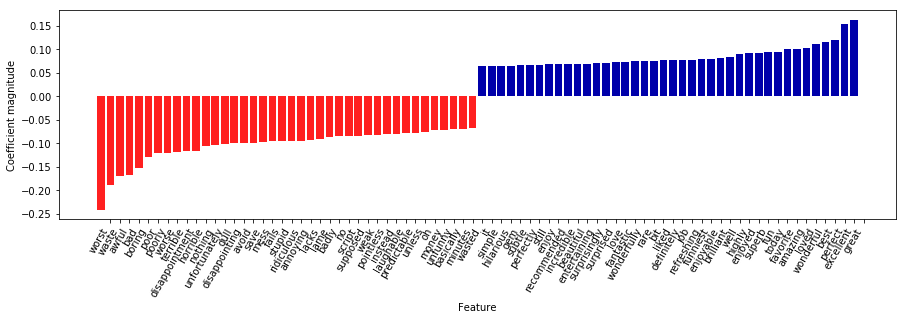

In [28]:
# We will use the last model that we trained, based on the tf–idf features.
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

> “The negative coefficients on the left belong to words that according to the model are indicative of negative reviews, while the positive coefficients on the right belong to words that according to the model indicate positive reviews”

Most of the terms are quite intuitive, like "worst", "waste", "disappointment", and "laughable" indicating bad movie reviews, while "excellent", "wonderful", "enjoyable", and "refreshing" indicate positive movie reviews. Some words are slightly less clear, like "bit", "job", and "today", but these might be part of phrases like “good job” or “best today.”

#### Bag of words with more than one word (n-grams)

One of the main disadvantages of using a bag-of-words representation is that word order is completely discarded. Therefore, the two strings “it’s bad, not good at all” and “it’s good, not bad at all” have exactly the same representation

From a BoW approach all words are broken into count and frequency with no preference to a word in particular, all words have same frequency here (1 in this case)and obviously there is no emphasis on "its good" and "not good" 

The words are just broken down and if we were talking about importance, ‘it’ is as important as ‘good’ or ‘bad’.


Also, another major drawback is say a document has 200 words, out of which ‘a’ comes 20 times, ‘the’ comes 15 times etc.


Bag of words needed an upgrade to incoporate this !


Many words which are repeated again and again are given more importance in final feature building and we miss out on context of less repeated but important words like "good", ...

Fortunately, there is a way of capturing context when using a bag-of-words representation, by not only considering the counts of single tokens, but also the counts of pairs or triplets of tokens that appear next to each other. Pairs of tokens are known as "bigrams", triplets of tokens are known as "trigrams", and more generally sequences of tokens are known as "n-grams". We can change the range of tokens that are considered as features by changing the ngram_range parameter of CountVectorizer or TfidfVectorizer.

In [44]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


We can use the ngram_range parameter, which is a tuple, consisting of the minimum length and the maximum length of the sequences of tokens that are considered. Here is an example on the toy data we used earlier

The default is to create one feature per sequence of tokens that is at least one token long and at most one token long, or in other words exactly one token long (single tokens are also called unigrams):

In [45]:

cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [46]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [47]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


> Using longer sequences of tokens usually results in many more features, and in more specific features. There is no common bigram between the two phrases in bard\_words:”

- “For most applications, the minimum number of tokens should be one, as single words often capture a lot of meaning. Adding bigrams helps in most cases” <br><br>
- Adding longer sequences—up to 5-grams—might help too, but this will lead to an explosion of the number of features and might lead to overfitting, as there will be many very specific features.

In [33]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabulary:['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']



> Let’s try out the TfidfVectorizer on the IMDb movie review data and find the best setting of n-gram range using a grid search

In [34]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid-search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


As you can see from the results, we improved performance by a bit more than a percent by adding bigram and trigram features. We can visualize the cross-validation accuracy as a function of the ngram_range and C parameter as a heat map

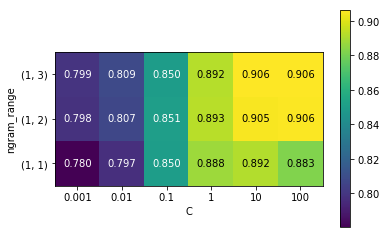

In [35]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

From the heat map we can see that using bigrams increases performance quite a bit, while adding trigrams only provides a very small benefit in terms of accuracy” 

(-22, 22)

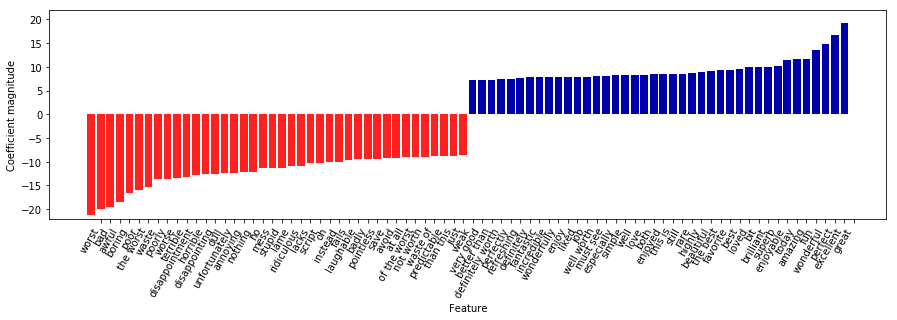

In [36]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

(-22, 22)

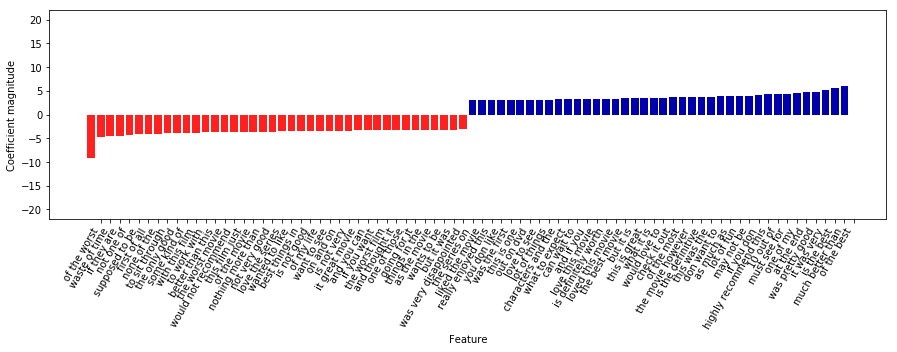

In [37]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

#### Advanced tokenization, stemming and lemmatization

- The feature extraction in the CountVectorizer and Tfidf Vectorizer is relatively simple, and much more elaborate methods are possible <br><br>
-  "replace", "replaced", "replace ment", "replaces", and "replacing" <br><br>
-  This problem can be overcome by representing each word using its word stem, which involves identifying (or conflating) all the words that have the same word stem.  <br><br>
-  If this is done by using a rule-based heuristic, like dropping common suffixes, it is usually referred to as stemming. <br><br>
-  If instead a dictionary of known word forms is used (an explicit and human-verified system), and the role of the word in the sentence is taken into account, the process is referred to as lemmatization and the standardized form of the word is referred to as the lemma <br><br>
-  Both processing methods, lemmatization and stemming, are forms of normalization that try to extract some normal form of a word. Another interesting case of normalization is spelling correction


> SpaCy does not provide a built-in function for Stemming as Stemming is not accurate and SpaCy is mainly created for Production level use. Inaccurate process is not obviously not useful for Production.



However it provides Lemmatization. Lemmatization does the same job but more accurately with the help of language specific dictionary and returns the exact root word.

In [62]:
# Lemmatizer: https://spacy.io/api/lemmatizer/
# make sure your downloaded the english model with "python -m spacy download en"
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apples and oranges are similar. Boots and hippos aren't.")

for token in doc:
    print(token, token.lemma_)

Apples apple
and and
oranges orange
are be
similar similar
. .
Boots boot
and and
hippos hippo
are be
n't not
. .


Contextual spell correction using [BERT(bidirectional representations)](https://spacy.io/universe/project/contextualSpellCheck)

In [52]:
import spacy
import contextualSpellCheck

nlp = spacy.load('en_core_web_sm')
contextualSpellCheck.add_to_pipe(nlp)
# million is spelled incorrectly
doc = nlp('Income was $9.4 milion compared to the prior year of $2.7 milion.') 

print(doc._.performed_spellCheck) #Should be True
print(doc._.outcome_spellCheck) #Income was $9.4 million compared to the prior year of $2.7 million.

Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 3.62kB/s]
Downloading: 100%|██████████| 570/570 [00:00<00:00, 157kB/s]
Downloading: 100%|██████████| 208k/208k [00:00<00:00, 696kB/s] 
Downloading: 100%|██████████| 426k/426k [00:00<00:00, 883kB/s] 
Downloading: 100%|██████████| 416M/416M [01:43<00:00, 4.23MB/s] 


True
Income was $9.4 million compared to the prior year of $2.7 million.


Let us compare lemmatization and steeming Porter Stemmer

In [64]:
#conda install nltk spacy
import spacy # You need to install spacy first
import nltk # You need to install nltk first

# load spacy's English-language models
en_nlp = spacy.load('en_core_web_sm') # spacy's English model
# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in nltk
def compare_normalization(doc):
    # tokenize document in spacy
    doc_spacy = en_nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter stemmer
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [65]:
compare_normalization("Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


> Stemming is always restricted to trimming the word to a stem, so "was" becomes "wa", while lemmatization can retrieve the correct base verb form, "be".  <br><br>
> Similarly, lemmatization can normalize "worse" to "bad", while stemming produces "wors".

> In general, lemmatization is a much more involved process than stemming, but it usually produces better results than stemming when used for normalizing tokens for machine learning.

In [78]:
# Technicallity: we want to use the regexp based tokenizer
# that is used by CountVectorizer  and only use the lemmatization
# from SpaCy. To this end, we replace en_nlp.tokenizer (the SpaCy tokenizer)
# with the regexp based tokenization
import re
# regexp used in CountVectorizer:
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# load spacy language model
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# create a custom tokenizer using the SpaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [ ]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

In [43]:
# build a grid-search using only 1% of the data as training set:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score "
      "(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# perform grid search with Lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(lemmatization): {:.3f}".format(grid.best_score_))

Best cross-validation score (standard CountVectorizer): 0.721
Best cross-validation score (lemmatization): 0.731


### Topic Modeling and Document Clustering


> One particular technique that is often applied to text data is topic modeling, which is an umbrella term describing the task of assigning each document to one or multiple topics, usually without supervision.

A good example for this is news data, which might be categorized into topics like “politics,” “sports,” “finance,” and so on. If each document is assigned a single topic, this is the task of clustering the documents

![](https://www.frontiersin.org/files/Articles/539160/frai-03-00042-HTML/image_m/frai-03-00042-g002.jpg)

![](https://i.ibb.co/zV5rjX6/Screen-Shot-2020-09-24-at-11-21-38.png)

#### Latent Dirichlet Allocation
Often, when people talk about topic modeling, they refer to one particular decomposition method called Latent Dirichlet Allocation (often LDA for short)

Intuitively, the LDA model tries to find groups of words (the topics) that appear together frequently.



> Let’s apply LDA to our movie review dataset to see how it works in practice. For unsupervised text document models, it is often good to remove very common words, as they might otherwise dominate the analysis. We’ll remove words that appear in at least 20 percent of the documents, and we’ll limit the bag-of-words model to the 10,000 words that are most common after removing the top 20 percen

In [69]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [73]:
#rent ordering, and changing the number of topics will change all of the topics.10 We’ll use the "batch" learning method, which is somewhat slower than the default ("online") but usually provides better results, and increase "max_iter", which can also lead to better models:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", 
                                max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

LDA has as a components_ attribute that stores how important each word is for each topic. The size of components_ is (n_topics, n_words)

In [43]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


To understand better what the different topics mean, we will look at the most important words for each of the topics. The print_topics function provides a nice formatting for these features:

In [47]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

In [48]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       thought       
real          american      laugh         tv            am            
us            our           jokes         episodes      thing         
director      documentary   fun           shows         got           
work          history       humor         season        10            
both          years         re            new           want          
beautiful     new           hilarious     years         going         
each          human         doesn         television    watched       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

> Next, we will learn another model, this time with 100 topics. Using more topics makes the analysis much harder, but makes it more likely that topics can specialize to interesting subsets of the data

In [49]:
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

Looking at all 100 topics would be a bit overwhelming, so we selected some interesting and representative topics:

In [50]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [51]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

> The topics we extracted this time seem to be more specific, though many are hard to interpret. Topic 7 seems to be about horror movies and thrillers; topics 16 and 54 seem to capture bad reviews, while topic 63 mostly seems to be capturing positive reviews of comedies.

 If we want to make further inferences using the topics that were discovered, we should confirm the intuition we gained from looking at the highestranking words for each topic by looking at the documents that are assigned to these topics. For example, topic 45 seems to be about music. Let’s check which kinds of reviews are assigned to this topic

In [52]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
    # show first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

As we can see, this topic covers a wide variety of music-centered reviews, from musicals, to biographical movies, to some hard-to-specify genre in the last review. Another interesting way to inspect the topics is to see how much weight each topic gets overall, by summing the document_topics over all reviews. We name each topic by the two most common words. Figure 7-6 shows the topic weights learned

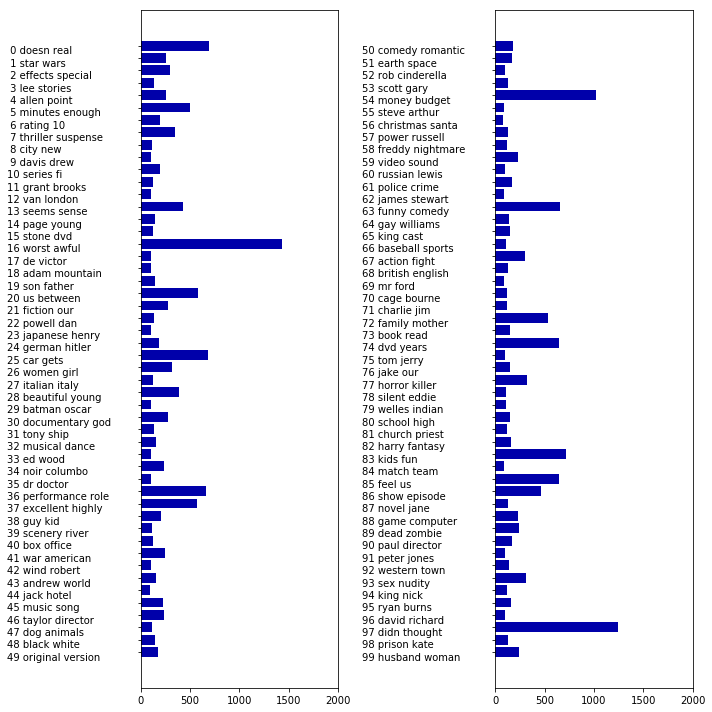

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

### Summary and Outlook

- In this chapter we talked about the basics of processing text, also known as natural language processing (NLP), with an example application classifying movie reviews. The tools discussed here should serve as a great starting point when trying to process <br><br >

- Natural language and text processing is a large research field, and discussing the details of advanced methods

- For more advanced text-processing methods, we recommend the Python packages spacy (a relatively new but very efficient and welldesigned package), nltk (a very well-established and complete but somewhat dated library), and gensim (an NLP package with an emphasis on topic modeling)

- There have been several very exciting new developments in text processing in recent years and relate to neural networks. The first is the use of continuous vector representations, also known as word vectors or distributed word representations, as implemented in the word2vec library. 

- Both Gensim and Spacy provides word vectors 

- Another direction in NLP that has picked up momentum in recent years is the use of recurrent neural networks (RNNs) for text processing. RNNs are a particularly powerful type of neural network that can produce output that is again text, in contrast to classification models that can only assign class labels